## Выгрузка данных

In [130]:
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [131]:
from google.colab import drive, files
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
! pip install -q kaggle

! rm -rf ~/.kaggle
! mkdir ~/.kaggle

! cp drive/MyDrive/kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [133]:
! kaggle datasets download -d jacksoncrow/stock-market-dataset

stock-market-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# ! mkdir train
# ! unzip stock-market-dataset.zip -d train

In [6]:
path = 'train/stocks/'

files = os.listdir(path)
df_list = []

for file in tqdm(files):
  df_tmp = pd.read_csv(path + file)
  df_tmp['symbol_name'] = file.split('.')[0]
  df_list.append(df_tmp)

  0%|          | 0/5884 [00:00<?, ?it/s]

In [7]:
df_stocks = pd.concat(df_list)

## EDA

In [134]:
df_aapl = df_stocks.query('symbol_name == "AAPL"')

df_aapl.sort_values('Date', inplace=True)

df_aapl.head()

<ipython-input-134-f62efe699bff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl.sort_values('Date', inplace=True)


,Date,Open,High,Low,Close,Adj Close,Volume,symbol_name
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400.0,AAPL
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200.0,AAPL
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000.0,AAPL
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400.0,AAPL
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400.0,AAPL


In [135]:
df_aapl.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,symbol_name
count,9909,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03,9909
unique,9909,NaN,NaN,NaN,NaN,NaN,NaN,1
top,1980-12-12,NaN,NaN,NaN,NaN,NaN,NaN,AAPL
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,9909
mean,NaN,32.606849,32.936079,32.277560,32.618030,30.576570,8.582916e+07,NaN
std,NaN,58.415759,59.001576,57.883037,58.471899,56.746275,8.597195e+07,NaN
min,NaN,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05,NaN
25%,NaN,1.071429,1.089286,1.048571,1.071429,0.917643,3.304230e+07,NaN
50%,NaN,1.729286,1.758929,1.696429,1.732143,1.466154,5.766490e+07,NaN
75%,NaN,35.799999,36.265713,35.328571,35.761429,31.042374,1.069992e+08,NaN


Поля Open, High, Low и Close лежат примерно в одном и том же диапазоне.

In [136]:
series = df_aapl.set_index('Date')

df_aapl = series.asfreq('D')

In [137]:
df_aapl.isnull().values.any()

True

In [139]:
## кол-во пропусков
df_aapl.isnull().sum().sum()

100492

Пропуски есть, их планируем заполнять нетипичным значением, так как в этот день скорее всего торгов не было.

In [13]:
df_symbols = pd.read_csv('train/symbols_valid_meta.csv')

In [14]:
df_symbols.query('Symbol == "AAPL"')

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
12,Y,AAPL,Apple Inc. - Common Stock,Q,Q,N,100.0,N,N,NaN,AAPL,N


<ipython-input-15-3845471d92ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl['Date'] = pd.to_datetime(df_aapl.Date)


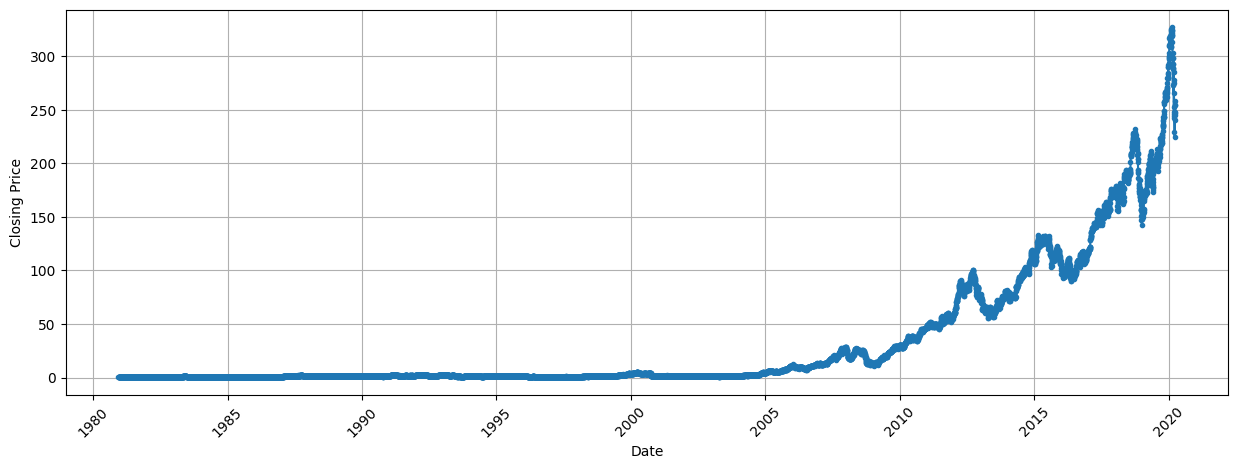

In [15]:
df_aapl['Date'] = pd.to_datetime(df_aapl.Date)

df_plot = df_aapl.copy()
df_plot.set_index('Date', inplace=True)

df_plot.drop(['symbol_name', 'Volume'], axis=1, inplace=True)

plt.figure(figsize=(15, 5))

plt.plot(df_plot.Close, marker='.')
# plt.legend(df_plot.columns)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Видно, что с 2005 года стоимость акций компании начала экспоненциально расти. Каждые, примерно, 3 года, были резкие скачки вверх.

In [16]:
df_aapl.corr()

<ipython-input-16-986b1b155c05>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_aapl.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999935,0.999931,0.999878,0.998933,-0.133347
High,0.999935,1.000000,0.999887,0.999929,0.999041,-0.132296
Low,0.999931,0.999887,1.000000,0.999931,0.998992,-0.135045
Close,0.999878,0.999929,0.999931,1.000000,0.999098,-0.133697
Adj Close,0.998933,0.999041,0.998992,0.999098,1.000000,-0.142612
Volume,-0.133347,-0.132296,-0.135045,-0.133697,-0.142612,1.000000


Цены довольно сильно скоррелированы друг с другом. С объемом акций корреляции нет.

## EDA по данным с 2010 года

In [114]:
df_aapl_short = df_aapl.query('Date >= "2010-01-01"')

In [118]:
## заполняем пропуски
df_aapl_short.Close.fillna(method='bfill', inplace=True)

<ipython-input-118-c834a2e8050d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl_short.Close.fillna(method='bfill', inplace=True)


In [119]:
df_marks_iphones = pd.read_excel('drive/MyDrive/apple.xlsx')

df_marks_iphones = df_marks_iphones[(df_marks_iphones['presentation date '] <= '2020-06-01') \
                                    & (df_marks_iphones['presentation date '] >= '2010-01-01')]

df_marks_iphones.head()

,model,presentation date,start dt of payment in world,start dt of payment in russia
3,iPhone 4,2010-06-07,2010-06-24,2010-09-22 00:00:00
4,iPhone 4S,2011-10-04,2011-10-14,2011-12-16 00:00:00
5,iPhone 5,2012-09-19,2012-09-21,2012-12-14 00:00:00
6,"iPhone 5S, 5C",2013-09-10,2013-09-20,2013-10-25 00:00:00
7,iPhone 6 (Plus),2014-09-09,2014-09-19,2014-09-26 00:00:00


In [120]:
df_marks_ipad = pd.read_excel('drive/MyDrive/apple ipad info.xlsx')

df_marks_ipad = df_marks_ipad[(df_marks_ipad['presentation_dt'] <= '2020-06-01') \
                              & (df_marks_ipad['presentation_dt'] >= '2010-01-01')]

df_marks_ipad.head()

,model,presentation_dt,sale_start_dt,sale_in_russia_start_dt
0,iPad,2010-01-27,2010-04-03 00:00:00,2010-11-09 00:00:00
1,iPad 2,2011-03-02,2011-03-11 00:00:00,2011-05-27 00:00:00
2,iPad 3,2012-03-07,2012-03-16 00:00:00,2012-05-25 00:00:00
3,iPad 4,2012-10-23,2012-11-02 00:00:00,2012-12-06 00:00:00
4,iPad mini,2012-10-23,2012-11-02 00:00:00,2012-12-14 00:00:00


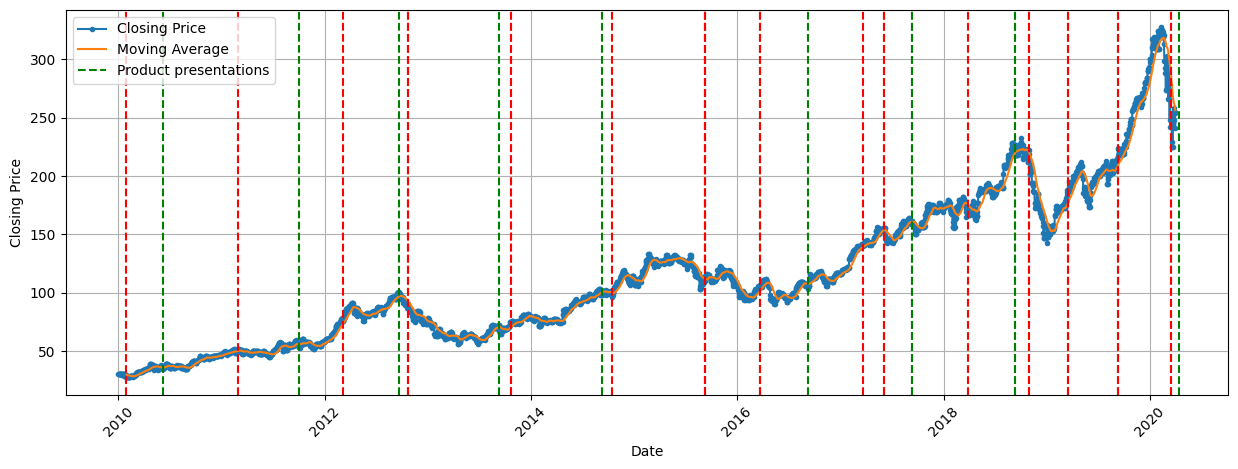

In [122]:
df_plot = df_aapl_short.copy()
df_plot['mv_avg'] = df_plot.Close.rolling(30).mean()
# df_plot.set_index('Date', inplace=True)

df_plot.drop(['symbol_name', 'Volume'], axis=1, inplace=True)

plt.figure(figsize=(15, 5))

plt.plot(df_plot.Close, marker='.')
plt.plot(df_plot.mv_avg)

for date in df_marks_iphones['presentation date ']:
  plt.axvline(date, color='g', linestyle='--')

for date in df_marks_ipad['presentation_dt']:
  plt.axvline(date, color='r', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(['Closing Price', 'Moving Average', 'Product presentations'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

На графике видно, что многие пики можно объяснить моментом презентации нового продукта.

Красная линия - момент перезентации нового ipad. Зеленая линия - нового iphone.

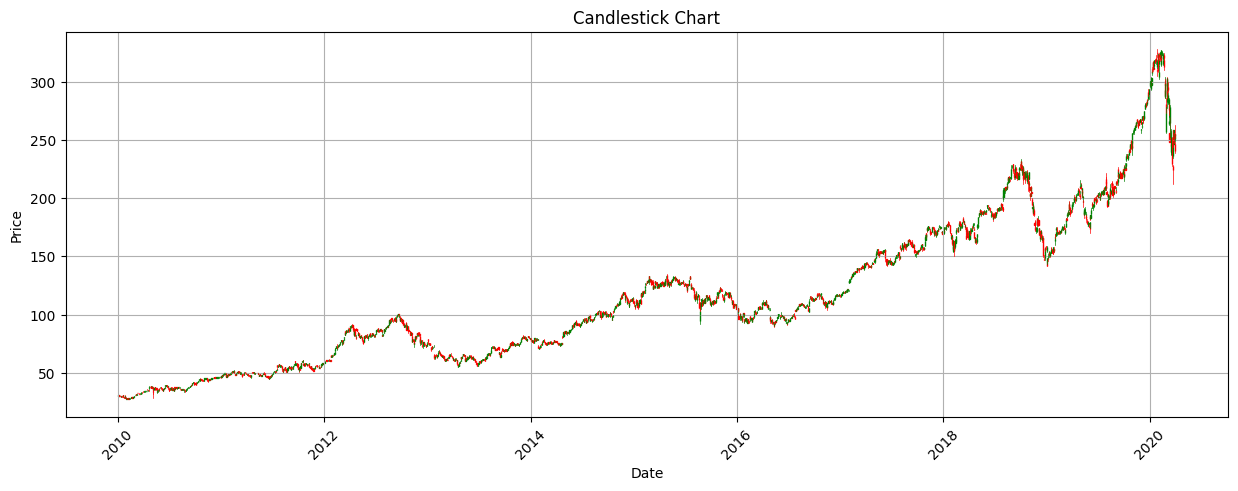

In [123]:
# Candlestick Chart
# !pip install mplfinance

from mplfinance.original_flavor import candlestick_ohlc

# Convert 'Date' column to matplotlib date format
matplotlib_date = mdates.date2num(df_aapl_short.reset_index()['Date'])

# Create an array of tuples in the required format
ohlc = np.vstack((matplotlib_date,
                  df_aapl_short['Open'],
                  df_aapl_short['High'],
                  df_aapl_short['Low'],
                  df_aapl_short['Close'])).T

plt.figure(figsize=(15, 5))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
plt.title('Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

В целом тренды цены акций компании тесно связаны с действиями компании и ситуацией в мире.

Так например, в 2007 году компания представляет новое устройство, которое значительно влияет на рынок мобильных устройств и цена акций растет вплоть до мирового кризиса в 2008.
В 2011 инвесторы позитивно встречают выход  AAPL на рынок Китая, цена акций сильно растет (первый большой пик после 2007).
В 2012 выходят негативные отчеты, неоправдывающие ожидания инвесторов, меняется исполнительный директор, выходят новые игроки на рынок планшетов и цена акций падает.
Создание успешных продуктов, хорошая отчетность, удовлетворяющая инвесторов привели к тому, что акции постоянно росли, не смотря на просадки в 2015-2016 году  из-за кризиса в Китае или сильное падение в 2019 на фоне плохих отчетов и торговой войны США и Китая.
Сильное негативное влияние оказал COVID-19.

Мы можем отслеживать изменение цены и более локально, например после презентаций новых устройств, как правило это оказывает позитивное влияние на стоимость акций компании

<Axes: >

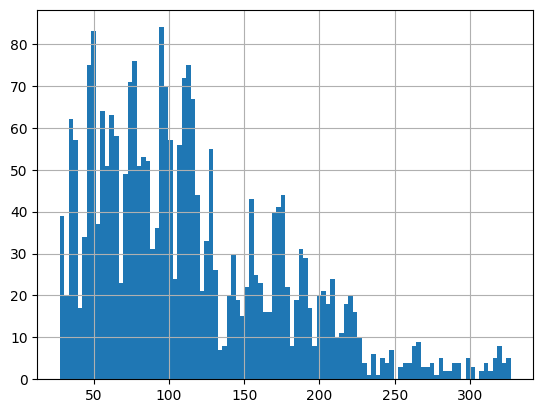

In [93]:
df_aapl_short.Close.hist(bins=100)

Разброс стоимости акции довольно большой - примерно от 30 до 350 долларов за штуку. Как-то однозначного среднего нет.

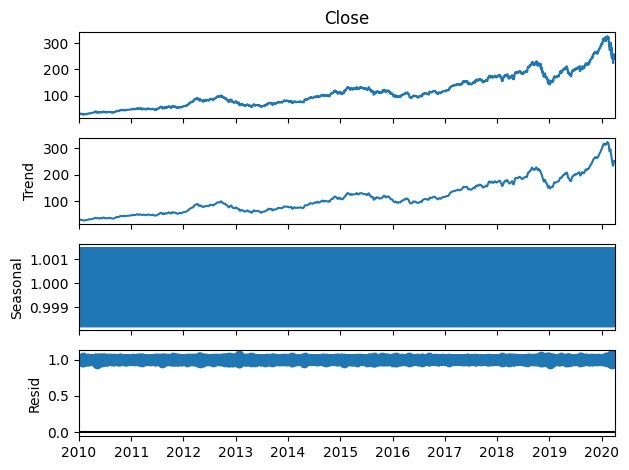

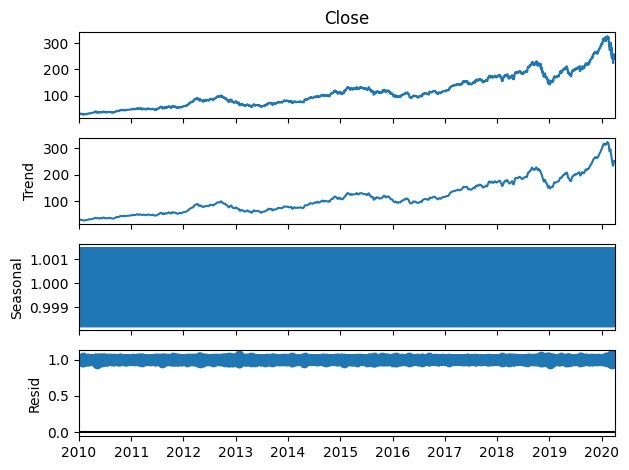

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = df_plot.Close

seasonal_decompose(series, model='multiplicative').plot()

Сезонности как таковой нет, ряд сложно разложить на компоненты.